# VGGNet + Inception modules

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, concatenate
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.utils import plot_model

In [2]:
base_filters = 32
input_layer = Input(shape=(56, 56, 3))

# conv 1
c1 = Conv2D(filters=base_filters * 2, kernel_size=(5, 5), padding='same', activation=relu)(input_layer)
bn1 = BatchNormalization()(c1)

# conv 2
c2 = Conv2D(filters=base_filters * 2, kernel_size=(5, 5), padding='same', activation=relu)(bn1)
bn2 = BatchNormalization()(c2)

# pooling and dropout
mp1 = MaxPooling2D(pool_size=(2, 2))(bn2)
do1 = Dropout(0.2)(mp1)

# inception module

# top layer
c2 = Conv2D(filters=base_filters * 2, kernel_size=(1, 1), padding='same', activation=relu)(do1)
c3 = Conv2D(filters=base_filters * 3, kernel_size=(1, 1), padding='same', activation=relu)(do1)
c4 = Conv2D(filters=base_filters // 2, kernel_size=(1, 1), padding='same', activation=relu)(do1)
mp2 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(do1)

# dimensional reduction layer
c5 = Conv2D(filters=base_filters * 4, kernel_size=(3, 3), padding='same', activation=relu)(c3)
c6 = Conv2D(filters=base_filters, kernel_size=(5, 5), padding='same', activation=relu)(c4)
c7 = Conv2D(filters=base_filters, kernel_size=(1, 1), padding='same', activation=relu)(mp2)

# depth concatenation
con1 = concatenate([c2, c5, c6, c7], axis=3)

# conv 3
c8 = Conv2D(filters=base_filters * 4, kernel_size=(5, 5), padding='same', activation=relu)(con1)
bn3 = BatchNormalization()(c8)

# conv 4
c9 = Conv2D(filters=base_filters * 4, kernel_size=(5, 5), padding='same', activation=relu)(bn3)
bn4 = BatchNormalization()(c9)

# pooling and dropout
mp3 = MaxPooling2D(pool_size=(2, 2))(bn4)
do2 = Dropout(0.3)(mp3)

# inception module
# top layer
c10 = Conv2D(filters=base_filters * 2, kernel_size=(1, 1), padding='same', activation=relu)(do2)
c11 = Conv2D(filters=base_filters * 3, kernel_size=(1, 1), padding='same', activation=relu)(do2)
c12 = Conv2D(filters=base_filters // 2, kernel_size=(1, 1), padding='same', activation=relu)(do2)
mp4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(do2)

# dimensional reduction layer
c13 = Conv2D(filters=base_filters * 4, kernel_size=(3, 3), padding='same', activation=relu)(c11)
c14 = Conv2D(filters=base_filters, kernel_size=(5, 5), padding='same', activation=relu)(c12)
c15 = Conv2D(filters=base_filters, kernel_size=(1, 1), padding='same', activation=relu)(mp4)

# depth concatenation
con2 = concatenate([c10, c13, c14, c15], axis=3)

# conv 5
c16 = Conv2D(filters=base_filters * 8, kernel_size=(3, 3), padding='same', activation=relu)(con2)
bn5 = BatchNormalization()(c16)

# conv 6
c17 = Conv2D(filters=base_filters * 8, kernel_size=(3, 3), padding='same', activation=relu)(bn5)
bn6 = BatchNormalization()(c17)

# pooling and dropout
mp5 = MaxPooling2D(pool_size=(2, 2))(bn6)
do3 = Dropout(0.4)(mp5)

# conv 7
c18 = Conv2D(filters=base_filters * 16, kernel_size=(3, 3), padding='same', activation=relu)(do3)
bn7 = BatchNormalization()(c18)

# conv 8
c19 = Conv2D(filters=base_filters * 16, kernel_size=(3, 3), padding='same', activation=relu)(bn7)
bn8 = BatchNormalization()(c19)

# conv 8
c20 = Conv2D(filters=base_filters * 16, kernel_size=(3, 3), padding='same', activation=relu)(bn8)
bn9 = BatchNormalization()(c20)

# pooling and dropout
mp6 = MaxPooling2D(pool_size=(2, 2))(bn9)
do4 = Dropout(0.4)(mp6)

# classifier
flat = Flatten()(do4)
d1 = Dense(units=1024, activation=relu)(flat)
do5 = Dropout(0.5)(d1)
d2 = Dense(units=1024, activation=relu)(do5)
do6 = Dropout(0.5)(d2)
output_layer = Dense(units=36, activation=sigmoid)(do6)

exp_conv = Model(input_layer, output_layer)
exp_conv.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 56, 56, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 56, 56, 64)   4864        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 56, 56, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 56, 56, 64)   102464      ['batch_normalization[0][0]']

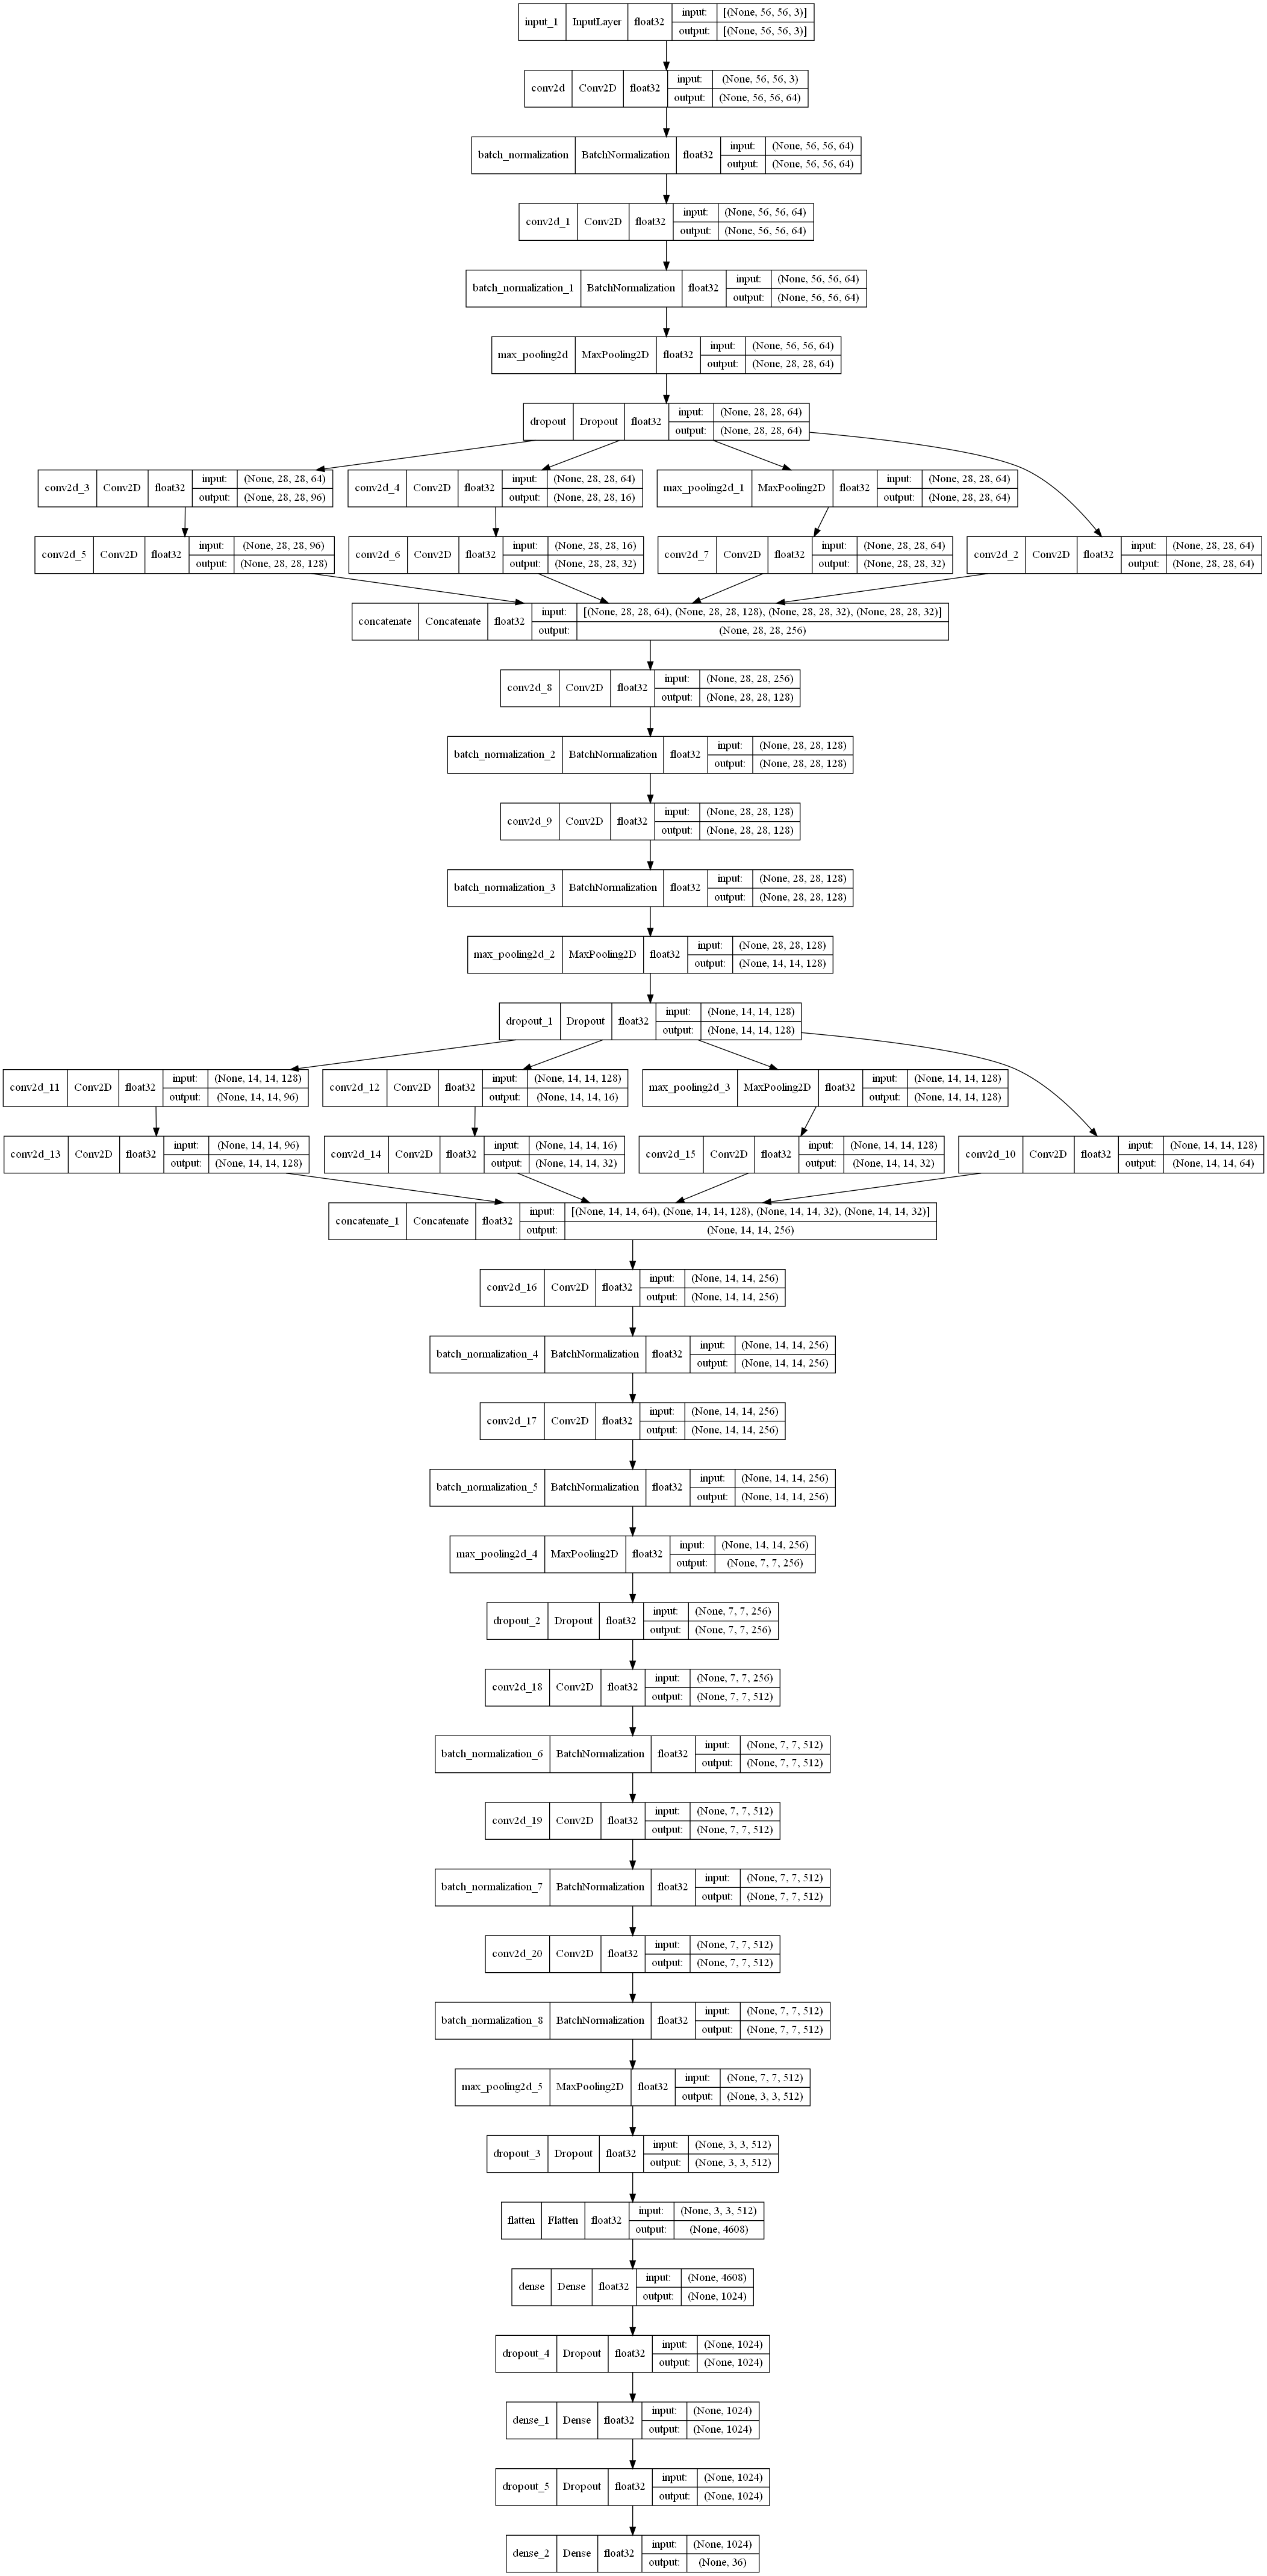

In [3]:
plot_model(exp_conv,
           to_file='VGGNet with INCEPTION.png',
           show_shapes=True,
           show_dtype=True,
           show_layer_names=True)